# [Step 1]: 데이터 불러오기


In [1]:
import pandas as pd
fifa2019 = pd.read_csv("fifa2019.csv")
df = pd.DataFrame.copy(fifa2019.sort_values(by='Overall', ascending=False).head(200)) # overall 점수가 높은 순으로 200명을 뽑아서 df란 객체로 만들기
test_features = ['Name', 'Stamina', 'Dribbling', 'ShortPassing', 'Penalties'] # 필요한 변수 목록 작성하기
test_df = pd.DataFrame(df, columns=test_features)
print(test_df.head(5))

                Name  Stamina  Dribbling  ShortPassing  Penalties
0           L. Messi     72.0       97.0          90.0       75.0
1  Cristiano Ronaldo     88.0       88.0          81.0       85.0
2          Neymar Jr     81.0       96.0          84.0       81.0
3             De Gea     43.0       18.0          50.0       40.0
4       K. De Bruyne     90.0       86.0          92.0       79.0


# [Step 2]: 학습 데이터 준비하기


In [2]:
import numpy as np
XY = np.array(test_df)
X = XY[:, 1:3]

# [Step 3]: K-평균 군집화 알고리즘 적용하기

## [1단계]: 표본 공간에 k개의 중심을 무작위로 생성하기

In [3]:
# 군집의 수에 맞춰 centroid를 무작위 좌표로 만들기
k = 3 # 군집의 수
C_x = np.random.choice(X[:, 0], k)
C_y = np.random.choice(X[:, 1], k)
C = np.array(list(zip(C_x, C_y))) #C_x와 C_y 쌍의 튜플을 만들어 list로 저장
print(C)

[[72. 67.]
 [32. 79.]
 [72. 82.]]


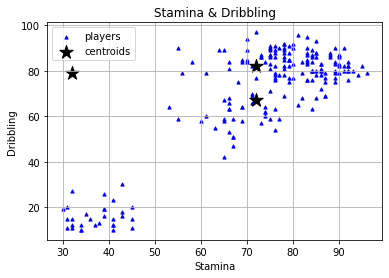

In [4]:
import matplotlib.pyplot as plt
Stamina = test_df['Stamina']
Dribbling = test_df['Dribbling']
plt.title('Stamina & Dribbling')
plt.xlabel('Stamina')
plt.ylabel('Dribbling')
plt.scatter(Stamina, Dribbling, marker = '^', c = 'blue', s = 10, label = 'players')
plt.scatter(C_x, C_y, marker = '*', s = 200, c = 'black', label = 'centroids')
plt.legend(loc = 'best')
plt.grid()
plt.show()

## [2단계]: 각 표본에 가까운 중심에 할당하기


In [5]:
# 유클리디안 거리 계산 함수 만들기
def Distance(A, B):
    return np.sqrt(np.sum(np.power((A-B), 2)))


In [6]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
flag = Distance(C, C_old)
print(C_old)
print(flag)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
169.84110221027183


## [3단계]: 각 군집의 중심을 새롭게 계산하기


In [7]:
from copy import deepcopy

distances = []
while flag != 0:
    for i in range(len(X)):
        for j in range(3):
            temp = Distance(X[i], C[j])
            distances.append(temp)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        distances = []
    C_old = deepcopy(C)

    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points)
    
    flag = Distance(C, C_old)


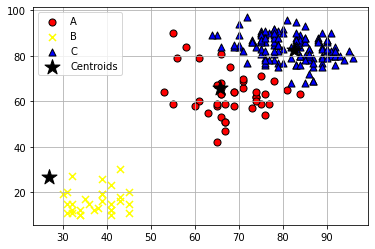

In [8]:
# 1번 군집
plt.scatter(X[clusters == 0,0], X[clusters == 0,1], s=50, c='red', marker='o', edgecolor='black', label='A')
            
# 2번군집
plt.scatter(X[clusters == 1,0], X[clusters == 1,1], s=50, c='yellow', marker='x', edgecolor='black', label='B')

# 3번 군집
plt.scatter(X[clusters == 2,0], X[clusters == 2,1], s=50, c='blue', marker='^', edgecolor='black', label='C')

# 군집의 중심 좌표들
plt.scatter(C[:, 0], C[:, 1], s=250, marker='*', c='black', edgecolor='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()

In [9]:
# ndarray로는 안되서, df 그대로 끌고 오기
feature = test_df[['Stamina', 'Dribbling']]
feature.head()

,Stamina,Dribbling
0,72.0,97.0
1,88.0,88.0
2,81.0,96.0
3,43.0,18.0
4,90.0,86.0


# Scikit learn으로 적합하고 그림 그리기


In [19]:
# scikit learn 이용하기 -- solved
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(feature)
predict = pd.DataFrame(kmeans.predict(feature))
predict.columns = ['predict']

In [16]:
# concatenate labels to df as a new columns
r = pd.concat([feature, predict], axis = 1)

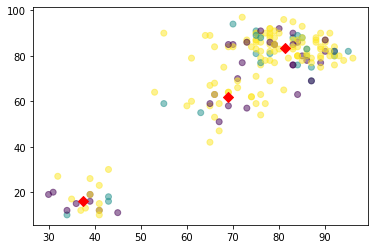

In [20]:
# scatter plot
plt.scatter(r['Stamina'], r['Dribbling'], c = r['predict'], alpha = 0.5)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Stamina', 'Dribbling'])
centers_x = centers['Stamina']
centers_y = centers['Dribbling']
plt.scatter(centers_x, centers_y, s = 50, marker = 'D', c = 'r')
plt.show()